<a href="https://colab.research.google.com/github/Dhawaldwivedi/Bca-5th-sem-AI-mmdu/blob/main/ai-ml2-g2/Kmeans_Clustering_using_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Show cluster assignments
print(df.head(10))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  


In [4]:
df['Actual'] = iris.target
print(df[['Cluster', 'Actual']].head(10))


   Cluster  Actual
0        1       0
1        1       0
2        1       0
3        1       0
4        1       0
5        1       0
6        1       0
7        1       0
8        1       0
9        1       0


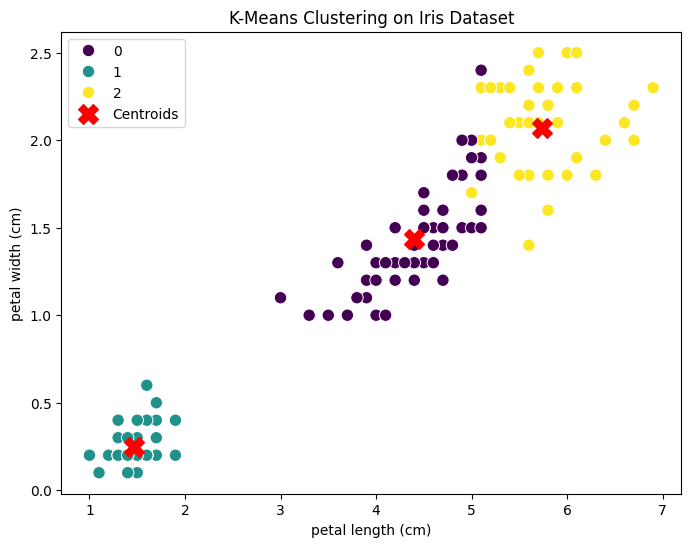

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['Cluster'],
    palette='viridis',
    s=80
)

# Mark centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:,2], centroids[:,3],
    c='red', s=200, marker='X', label='Centroids'
)

plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

score = silhouette_score(iris.data, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.5528190123564095
